In [64]:
import pandas as pd
import numpy as np

In [65]:
import seaborn as sns

In [89]:
import matplotlib.pyplot as plt

In [66]:
data1=pd.read_csv(r"C:\Users\rajaa\Downloads\customer_data.csv")
data2=pd.read_csv(r"C:\Users\rajaa\Downloads\churn_data.csv")
data3=pd.read_csv(r"C:\Users\rajaa\Downloads\internet_data.csv")

In [67]:
data1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [69]:
data1.shape

(7043, 5)

In [70]:
data2.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [71]:
data2.shape

(7043, 9)

In [72]:
data3.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [74]:
data3.shape

(7043, 9)

In [75]:
dataset1=pd.merge(data1,data2, on='customerID', how='inner')

In [76]:
dataset1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [78]:
dataset1.shape

(7043, 13)

In [84]:
dataset= pd.merge(dataset1, data3,on='customerID', how='inner')

In [85]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,...,TotalCharges,Churn,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,Female,0,Yes,No,1,No,Month-to-month,Yes,Electronic check,...,29.85,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,No,No,34,Yes,One year,No,Mailed check,...,1889.5,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Male,0,No,No,2,Yes,Month-to-month,Yes,Mailed check,...,108.15,Yes,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,Male,0,No,No,45,No,One year,No,Bank transfer (automatic),...,1840.75,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Female,0,No,No,2,Yes,Month-to-month,Yes,Electronic check,...,151.65,Yes,No,Fiber optic,No,No,No,No,No,No


In [87]:
dataset.shape

(7043, 21)

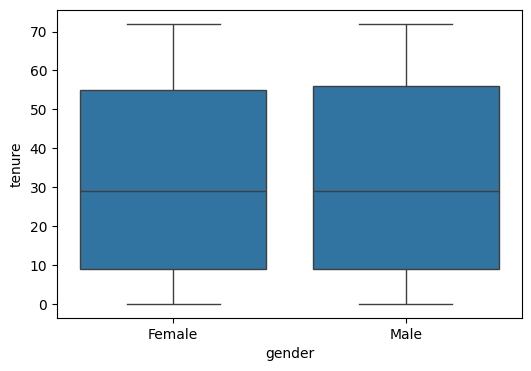

In [98]:
plt.figure(figsize=(6,4))
sns.boxplot(x='gender', y='tenure', data=dataset)
plt.show()

In [99]:
dataset.gender.value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [105]:
gender= dataset.groupby(['gender'])

In [110]:
gender['Contract'].describe()

,count,unique,top,freq
gender,,,,
Female,3488,3,Month-to-month,1925
Male,3555,3,Month-to-month,1950


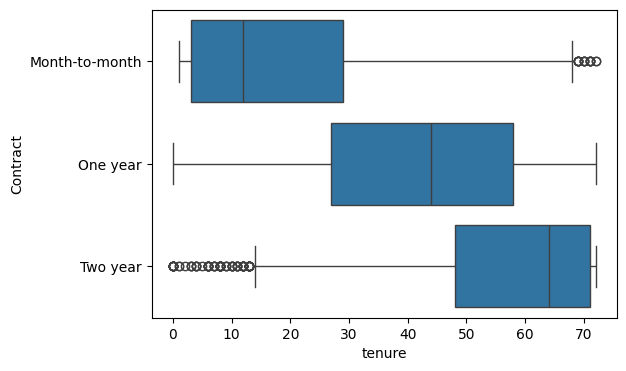

In [112]:
plt.figure(figsize=(6,4))
sns.boxplot(x=dataset['tenure'], y=dataset['Contract'])
plt.show()

In [113]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [122]:
def binarymap(x):
    return x.map({'Yes':1, 'No':0})

In [123]:
cols=['Partner','Dependents','PhoneService','PaperlessBilling','Churn']

In [127]:
dataset[cols]=dataset[cols].apply(binarymap)

In [175]:
dataset.MultipleLines.value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [128]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,...,TotalCharges,Churn,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,Female,0,1,0,1,0,Month-to-month,1,Electronic check,...,29.85,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,0,0,34,1,One year,0,Mailed check,...,1889.5,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Male,0,0,0,2,1,Month-to-month,1,Mailed check,...,108.15,1,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,Male,0,0,0,45,0,One year,0,Bank transfer (automatic),...,1840.75,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Female,0,0,0,2,1,Month-to-month,1,Electronic check,...,151.65,1,No,Fiber optic,No,No,No,No,No,No


In [131]:
catdata=pd.get_dummies(dataset[['gender','Contract','PaymentMethod','MultipleLines']], drop_first=True, dtype=int )

In [132]:
catdata.head()

,gender_Male,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No phone service,MultipleLines_Yes
0,0,0,0,0,1,0,1,0
1,1,1,0,0,0,1,0,0
2,1,0,0,0,0,1,0,0
3,1,1,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0


In [134]:
catdata.shape

(7043, 8)

In [166]:
catdatainternet = pd.get_dummies(dataset['InternetService'], drop_first=True, dtype=int,prefix='InternetService')

In [167]:
catdatainternet.head()

,InternetService_Fiber optic,InternetService_No
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0


In [139]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [140]:
cols2=['OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

In [148]:
tes1= pd.get_dummies(dataset['OnlineSecurity'], dtype=int, prefix='OnlineSecurity')

In [150]:
tes2= pd.get_dummies(dataset['OnlineBackup'], dtype=int, prefix='OnlineBackup')

In [152]:
tes3= pd.get_dummies(dataset['DeviceProtection'], dtype=int, prefix='DeviceProtection')

In [153]:
tes4= pd.get_dummies(dataset['TechSupport'], dtype=int, prefix='TechSupport')

In [154]:
tes5= pd.get_dummies(dataset['StreamingTV'], dtype=int, prefix='StreamingTV')

In [155]:
tes6= pd.get_dummies(dataset['StreamingMovies'], dtype=int, prefix='StreamingMovies')

In [156]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,...,TotalCharges,Churn,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,Female,0,1,0,1,0,Month-to-month,1,Electronic check,...,29.85,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,0,0,34,1,One year,0,Mailed check,...,1889.5,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Male,0,0,0,2,1,Month-to-month,1,Mailed check,...,108.15,1,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,Male,0,0,0,45,0,One year,0,Bank transfer (automatic),...,1840.75,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Female,0,0,0,2,1,Month-to-month,1,Electronic check,...,151.65,1,No,Fiber optic,No,No,No,No,No,No


In [160]:
newdset=pd.concat((dataset,catdata),axis=1)

In [161]:
newdset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,...,StreamingTV,StreamingMovies,gender_Male,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No phone service,MultipleLines_Yes
0,7590-VHVEG,Female,0,1,0,1,0,Month-to-month,1,Electronic check,...,No,No,0,0,0,0,1,0,1,0
1,5575-GNVDE,Male,0,0,0,34,1,One year,0,Mailed check,...,No,No,1,1,0,0,0,1,0,0
2,3668-QPYBK,Male,0,0,0,2,1,Month-to-month,1,Mailed check,...,No,No,1,0,0,0,0,1,0,0
3,7795-CFOCW,Male,0,0,0,45,0,One year,0,Bank transfer (automatic),...,No,No,1,1,0,0,0,0,1,0
4,9237-HQITU,Female,0,0,0,2,1,Month-to-month,1,Electronic check,...,No,No,0,0,0,0,1,0,0,0


In [162]:
dropedset=newdset.drop(['gender','Contract','PaymentMethod','MultipleLines'], axis=1)

In [163]:
dropedset.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingTV,StreamingMovies,gender_Male,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No phone service,MultipleLines_Yes
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,...,No,No,0,0,0,0,1,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,56.95,1889.5,0,...,No,No,1,1,0,0,0,1,0,0
2,3668-QPYBK,0,0,0,2,1,1,53.85,108.15,1,...,No,No,1,0,0,0,0,1,0,0
3,7795-CFOCW,0,0,0,45,0,0,42.30,1840.75,0,...,No,No,1,1,0,0,0,0,1,0
4,9237-HQITU,0,0,0,2,1,1,70.70,151.65,1,...,No,No,0,0,0,0,1,0,0,0


In [168]:
set1=pd.concat((dropedset,catdatainternet),axis=1)

In [169]:
set1.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,gender_Male,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,1,0,1,0,0,0
1,5575-GNVDE,0,0,0,34,1,0,56.95,1889.5,0,...,1,1,0,0,0,1,0,0,0,0
2,3668-QPYBK,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,0,0,1,0,0,0,0
3,7795-CFOCW,0,0,0,45,0,0,42.30,1840.75,0,...,1,1,0,0,0,0,1,0,0,0
4,9237-HQITU,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,1,0,0,0,1,0


In [170]:
set1.columns

Index(['customerID', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'gender_Male', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No'],
      dtype='object')

In [171]:
dset=set1.drop('InternetService',axis=1)

In [172]:
dset.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,gender_Male,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,1,0,1,0,0,0
1,5575-GNVDE,0,0,0,34,1,0,56.95,1889.5,0,...,1,1,0,0,0,1,0,0,0,0
2,3668-QPYBK,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,0,0,1,0,0,0,0
3,7795-CFOCW,0,0,0,45,0,0,42.30,1840.75,0,...,1,1,0,0,0,0,1,0,0,0
4,9237-HQITU,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,1,0,0,0,1,0


In [174]:
dset.loc[:,'Churn':]

,Churn,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender_Male,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No
0,0,No,Yes,No,No,No,No,0,0,0,0,1,0,1,0,0,0
1,0,Yes,No,Yes,No,No,No,1,1,0,0,0,1,0,0,0,0
2,1,Yes,Yes,No,No,No,No,1,0,0,0,0,1,0,0,0,0
3,0,Yes,No,Yes,Yes,No,No,1,1,0,0,0,0,1,0,0,0
4,1,No,No,No,No,No,No,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,No,Yes,Yes,Yes,Yes,1,1,0,0,0,1,0,1,0,0
7039,0,No,Yes,Yes,No,Yes,Yes,0,1,0,1,0,0,0,1,1,0
7040,0,Yes,No,No,No,No,No,0,0,0,0,1,0,1,0,0,0
7041,1,No,No,No,No,No,No,1,0,0,0,0,1,0,1,1,0


In [176]:
nndat= pd.concat((dset,tes1),axis=1)

In [177]:
nnndat= pd.concat((nndat,tes2),axis=1)

In [178]:
nnn1dat= pd.concat((nnndat,tes3),axis=1)

In [179]:
nnn2dat= pd.concat((nnn1dat,tes4),axis=1)

In [180]:
nnn3dat= pd.concat((nnn2dat,tes5),axis=1)

In [181]:
nnn4dat= pd.concat((nnn3dat,tes6),axis=1)

In [183]:
nnn4dat.shape

(7043, 44)

In [ ]:
procdata=nnn4data.drop([],axis=1)

In [186]:
nnn4dat.loc[:,'OnlineSecurity_No':]

,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0
2,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
3,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0
4,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1
7039,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1
7040,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
7041,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [187]:
procdata= nnn4dat.drop(['OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'], axis=1)

In [188]:
procdata.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,...,0,1,0,0,1,0,0,1,0,0
1,5575-GNVDE,0,0,0,34,1,0,56.95,1889.5,0,...,1,1,0,0,1,0,0,1,0,0
2,3668-QPYBK,0,0,0,2,1,1,53.85,108.15,1,...,0,1,0,0,1,0,0,1,0,0
3,7795-CFOCW,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,1,1,0,0,1,0,0
4,9237-HQITU,0,0,0,2,1,1,70.70,151.65,1,...,0,1,0,0,1,0,0,1,0,0


In [189]:
procdata.columns

Index(['customerID', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'gender_Male', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes'],
 

In [204]:
round((procdata.isnull().sum()/len(procdata.index))*100,2)

customerID                               0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
gender_Male                              0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
MultipleLines_No phone service           0.0
MultipleLines_Yes                        0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
OnlineSecurity_No                        0.0
OnlineSecurity_No internet service       0.0
OnlineSecu

In [203]:
procdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   object 
 9   Churn                                  7043 non-null   int64  
 10  gender_Male                            7043 non-null   int32  
 11  Cont

In [233]:
procdata['TotalCharges']=procdata['TotalCharges'].apply(pd.to_numeric, errors='coerce').fillna('Nan').astype(float)

In [235]:
procdata.isnull().sum()

customerID                                0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
gender_Male                               0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No                         0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes              

In [234]:
round((procdata.isnull().sum()/len(procdata.index))*100,2)

customerID                               0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
gender_Male                              0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
MultipleLines_No phone service           0.00
MultipleLines_Yes                        0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
OnlineSecurity_No                        0.00
OnlineSecurity_No internet service

In [242]:
procdata[np.isnan(procdata['TotalCharges'])].shape

(11, 38)

In [247]:
procdata=procdata[~np.isnan(procdata['TotalCharges'])]

In [652]:
procdata.shape

(7032, 38)

In [653]:
procdata.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,...,0,1,0,0,1,0,0,1,0,0
1,5575-GNVDE,0,0,0,34,1,0,56.95,1889.50,0,...,1,1,0,0,1,0,0,1,0,0
2,3668-QPYBK,0,0,0,2,1,1,53.85,108.15,1,...,0,1,0,0,1,0,0,1,0,0
3,7795-CFOCW,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,1,1,0,0,1,0,0
4,9237-HQITU,0,0,0,2,1,1,70.70,151.65,1,...,0,1,0,0,1,0,0,1,0,0


In [654]:
procdata[['tenure','MonthlyCharges','TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


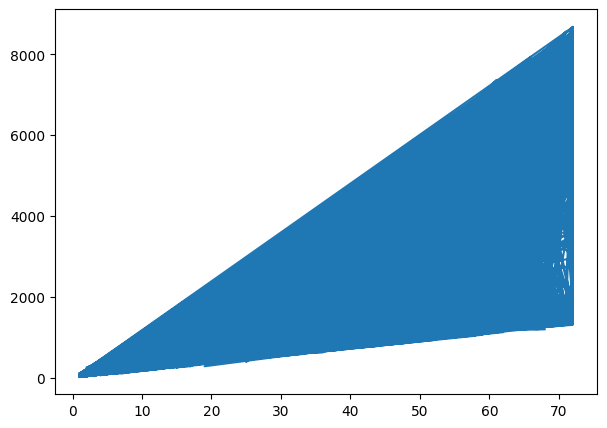

In [260]:
plt.figure(figsize=(7,5))
plt.plot(procdata['tenure'], procdata['TotalCharges'])
plt.show()

In [261]:
procdata[['tenure','MonthlyCharges','TotalCharges']].describe(percentiles=[0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90])

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
10%,2.000000,20.050000,84.600000
20%,6.000000,25.050000,267.070000
30%,12.000000,45.900000,551.995000
40%,20.000000,58.920000,944.170000
50%,29.000000,70.350000,1397.475000
60%,40.000000,79.150000,2048.950000


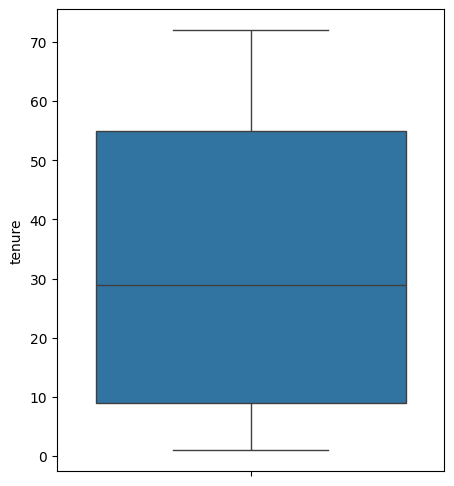

In [265]:
plt.figure(figsize=(5,6))
sns.boxplot(procdata['tenure'])
plt.show()

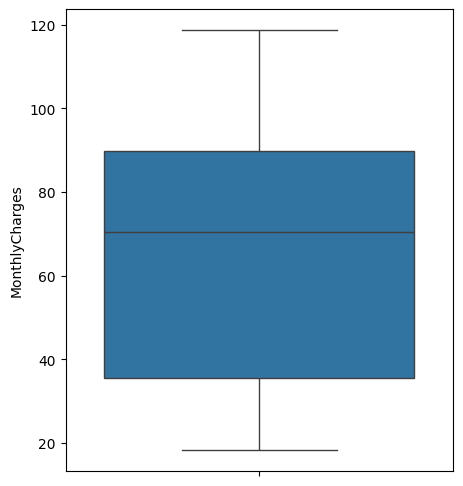

In [266]:
plt.figure(figsize=(5,6))
sns.boxplot(procdata['MonthlyCharges'])
plt.show()

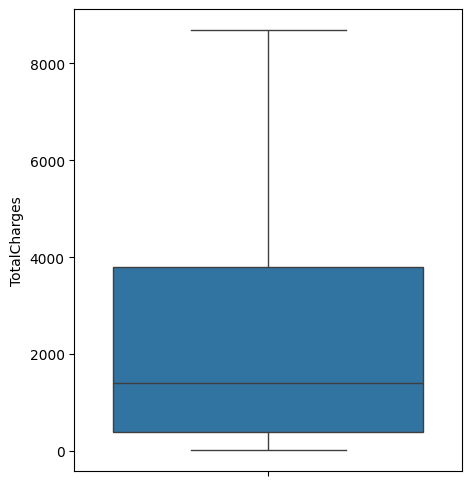

In [267]:
plt.figure(figsize=(5,6))
sns.boxplot(procdata['TotalCharges'])
plt.show()

In [655]:
procdata.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,...,0,1,0,0,1,0,0,1,0,0
1,5575-GNVDE,0,0,0,34,1,0,56.95,1889.50,0,...,1,1,0,0,1,0,0,1,0,0
2,3668-QPYBK,0,0,0,2,1,1,53.85,108.15,1,...,0,1,0,0,1,0,0,1,0,0
3,7795-CFOCW,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,1,1,0,0,1,0,0
4,9237-HQITU,0,0,0,2,1,1,70.70,151.65,1,...,0,1,0,0,1,0,0,1,0,0


In [595]:
procdata.shape

(7032, 38)

In [656]:
from sklearn.model_selection import train_test_split

In [657]:
dataforsplit=procdata.loc[:, 'SeniorCitizen': ]

In [658]:
y=dataforsplit.pop('Churn')

In [659]:
X=dataforsplit

In [947]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.70,random_state=100)

In [661]:
from sklearn.preprocessing import StandardScaler

In [662]:
X_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Male,Contract_One year,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
879,0,0,0,33,1,1,54.65,1665.20,1,0,...,0,1,0,0,1,0,0,1,0,0
5790,0,1,1,40,0,1,50.85,2036.55,0,0,...,0,1,0,0,0,0,1,0,0,1
6498,0,0,0,1,1,1,82.30,82.30,0,0,...,1,1,0,0,1,0,0,1,0,0
880,0,0,0,10,1,1,110.10,1043.30,1,0,...,1,0,0,1,0,0,1,0,0,1
2784,0,0,1,4,1,1,98.10,396.30,0,0,...,1,0,0,1,0,0,1,0,0,1


In [663]:
cols=['tenure','MonthlyCharges', 'TotalCharges']

In [664]:
X_train[cols]

,tenure,MonthlyCharges,TotalCharges
879,33,54.65,1665.20
5790,40,50.85,2036.55
6498,1,82.30,82.30
880,10,110.10,1043.30
2784,4,98.10,396.30
...,...,...,...
79,45,25.90,1216.60
3934,10,40.25,411.45
5964,49,61.75,3024.15
6947,68,101.05,6770.50


In [665]:
scaler=StandardScaler()

In [666]:
X_train[cols] = scaler.fit_transform(X_train[cols])

In [667]:
X_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Male,Contract_One year,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
879,0,0,0,0.019693,1,1,-0.338074,-0.276449,1,0,...,0,1,0,0,1,0,0,1,0,0
5790,0,1,1,0.305384,0,1,-0.464443,-0.112702,0,0,...,0,1,0,0,0,0,1,0,0,1
6498,0,0,0,-1.286319,1,1,0.581425,-0.974430,0,0,...,1,1,0,0,1,0,0,1,0,0
880,0,0,0,-0.919003,1,1,1.505913,-0.550676,1,0,...,1,0,0,1,0,0,1,0,0,1
2784,0,0,1,-1.163880,1,1,1.106854,-0.835971,0,0,...,1,0,0,1,0,0,1,0,0,1


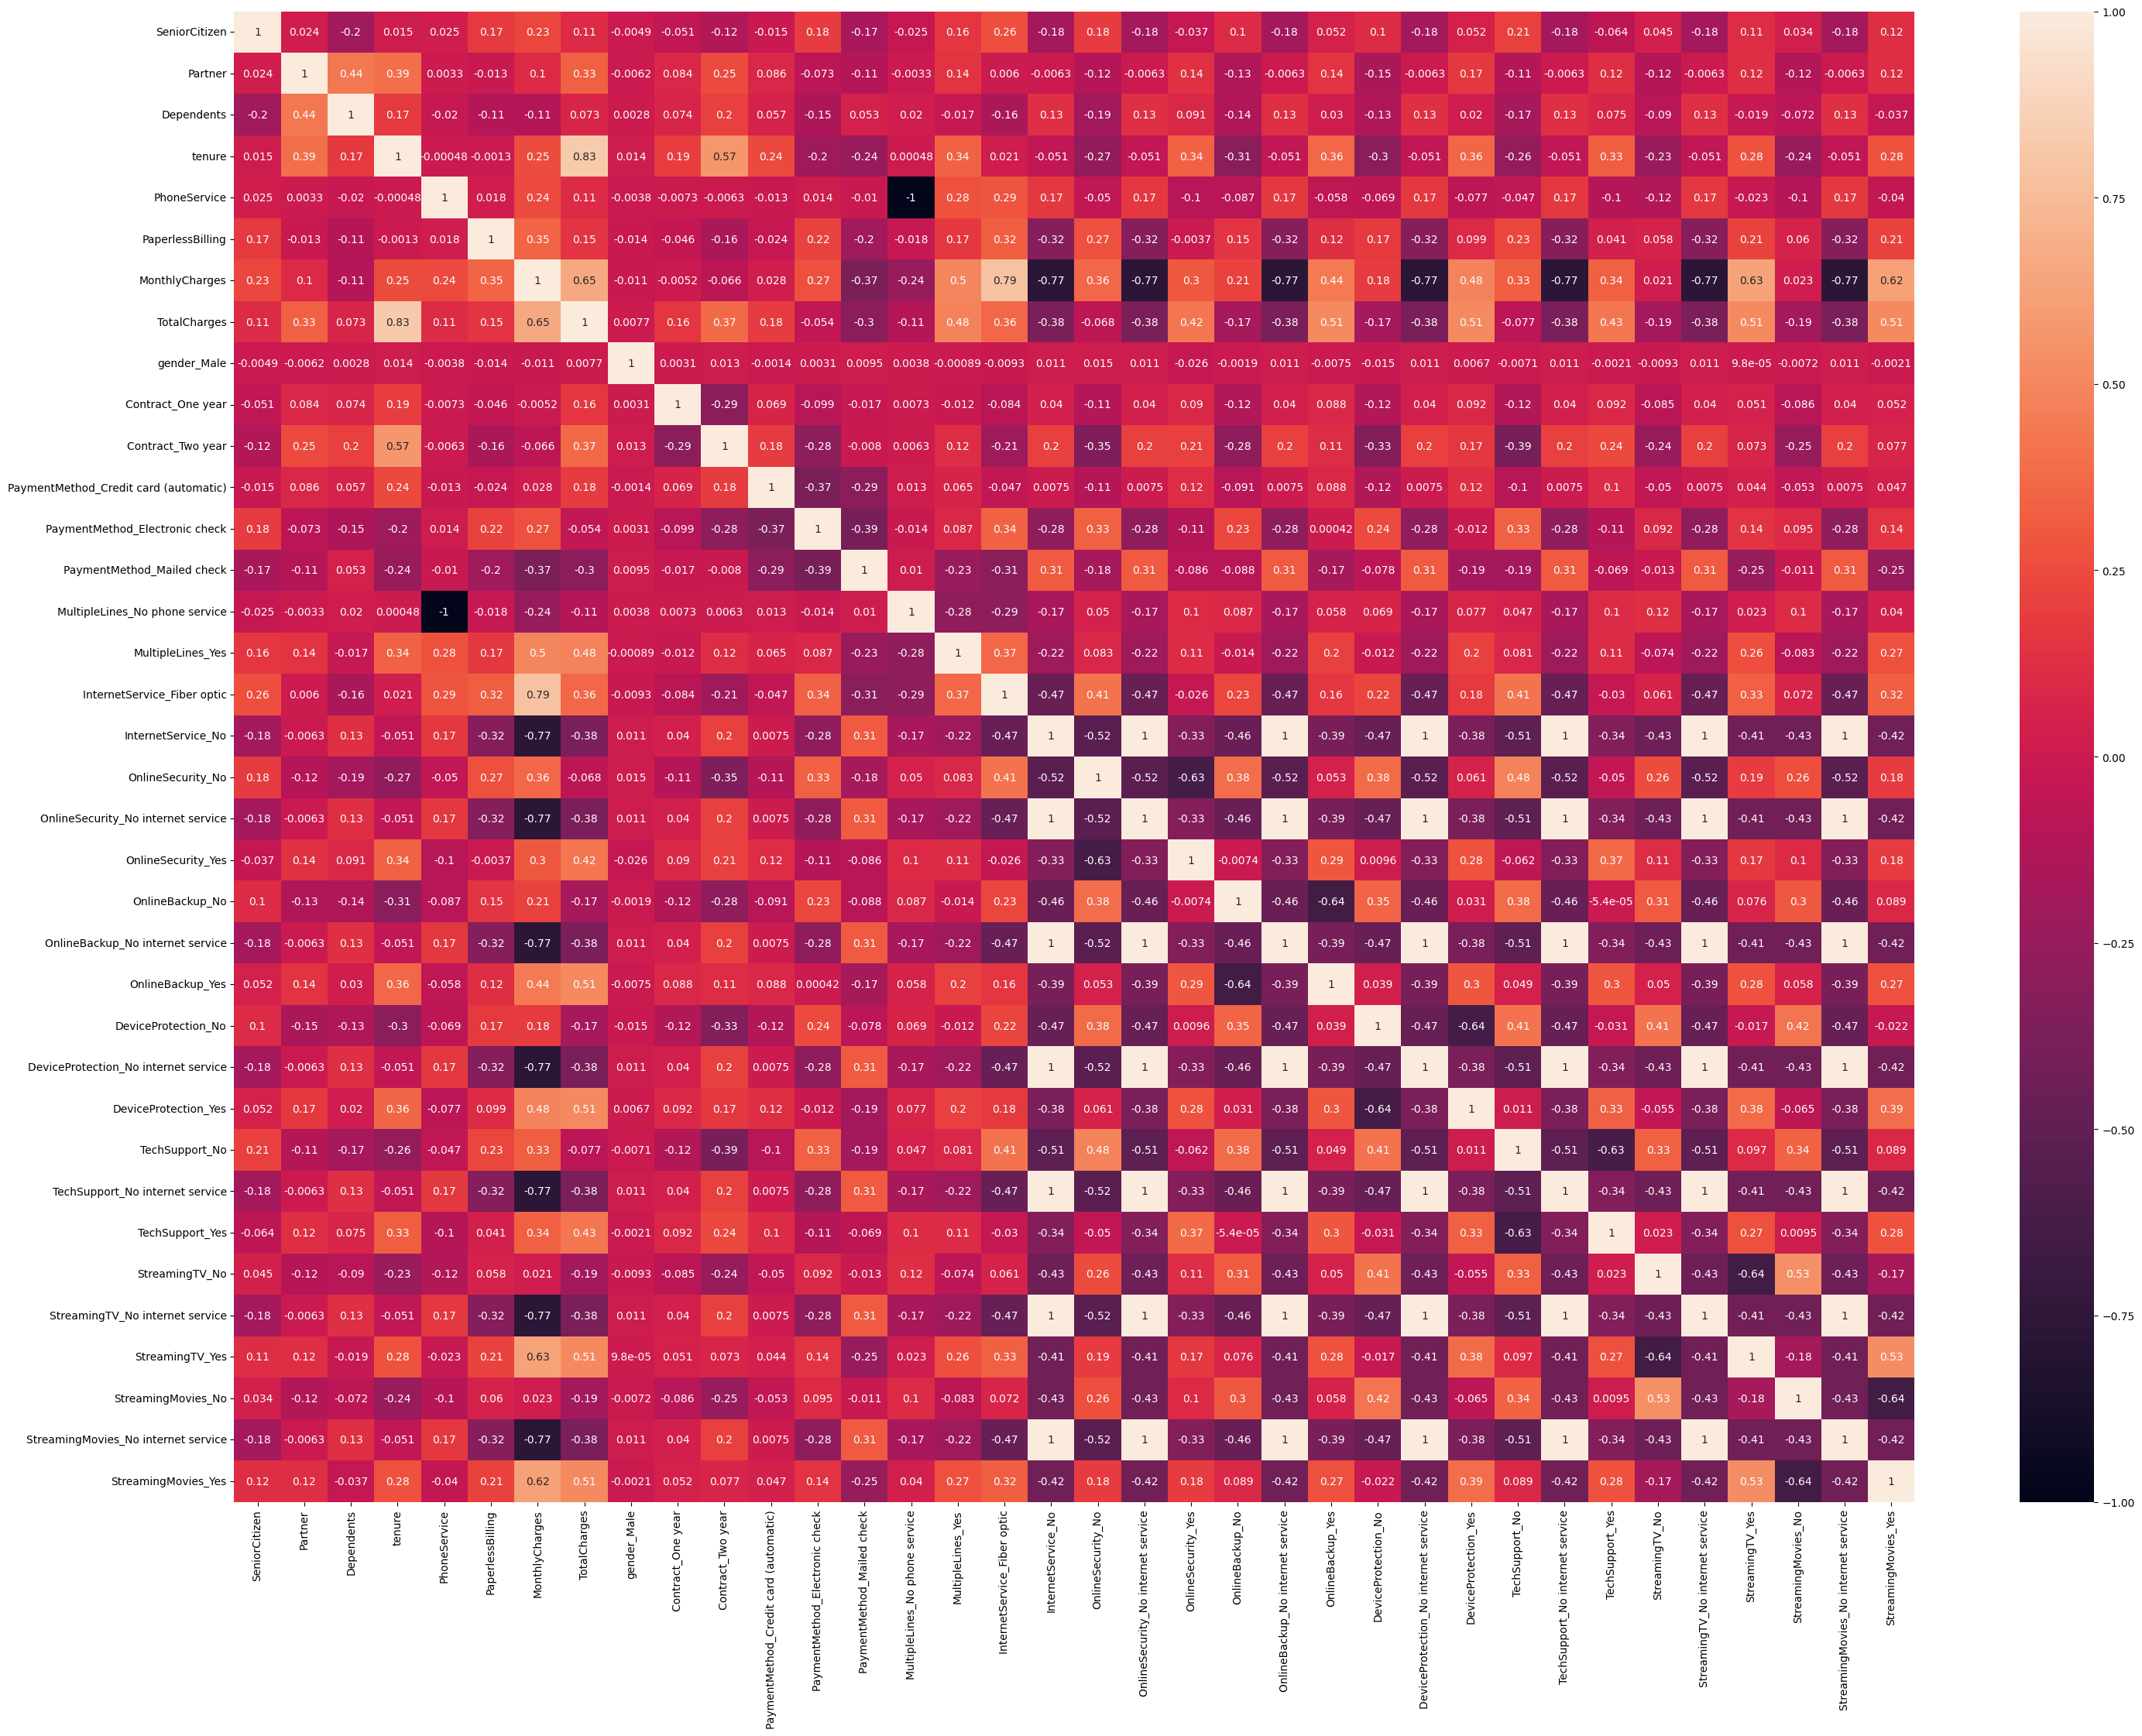

In [499]:
plt.figure(figsize=(35,25))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

In [608]:
X_train.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'gender_Male',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes'],
      dtype='object')

In [668]:
X_train.drop(['OnlineSecurity_No internet service','OnlineBackup_No internet service','DeviceProtection_No internet service','TechSupport_No internet service','StreamingMovies_No internet service'],axis=1, inplace=True)

In [669]:
X_train.drop(['StreamingTV_No internet service'],axis=1, inplace=True)

In [670]:
X_train.drop(['MultipleLines_No phone service'],axis=1, inplace=True)

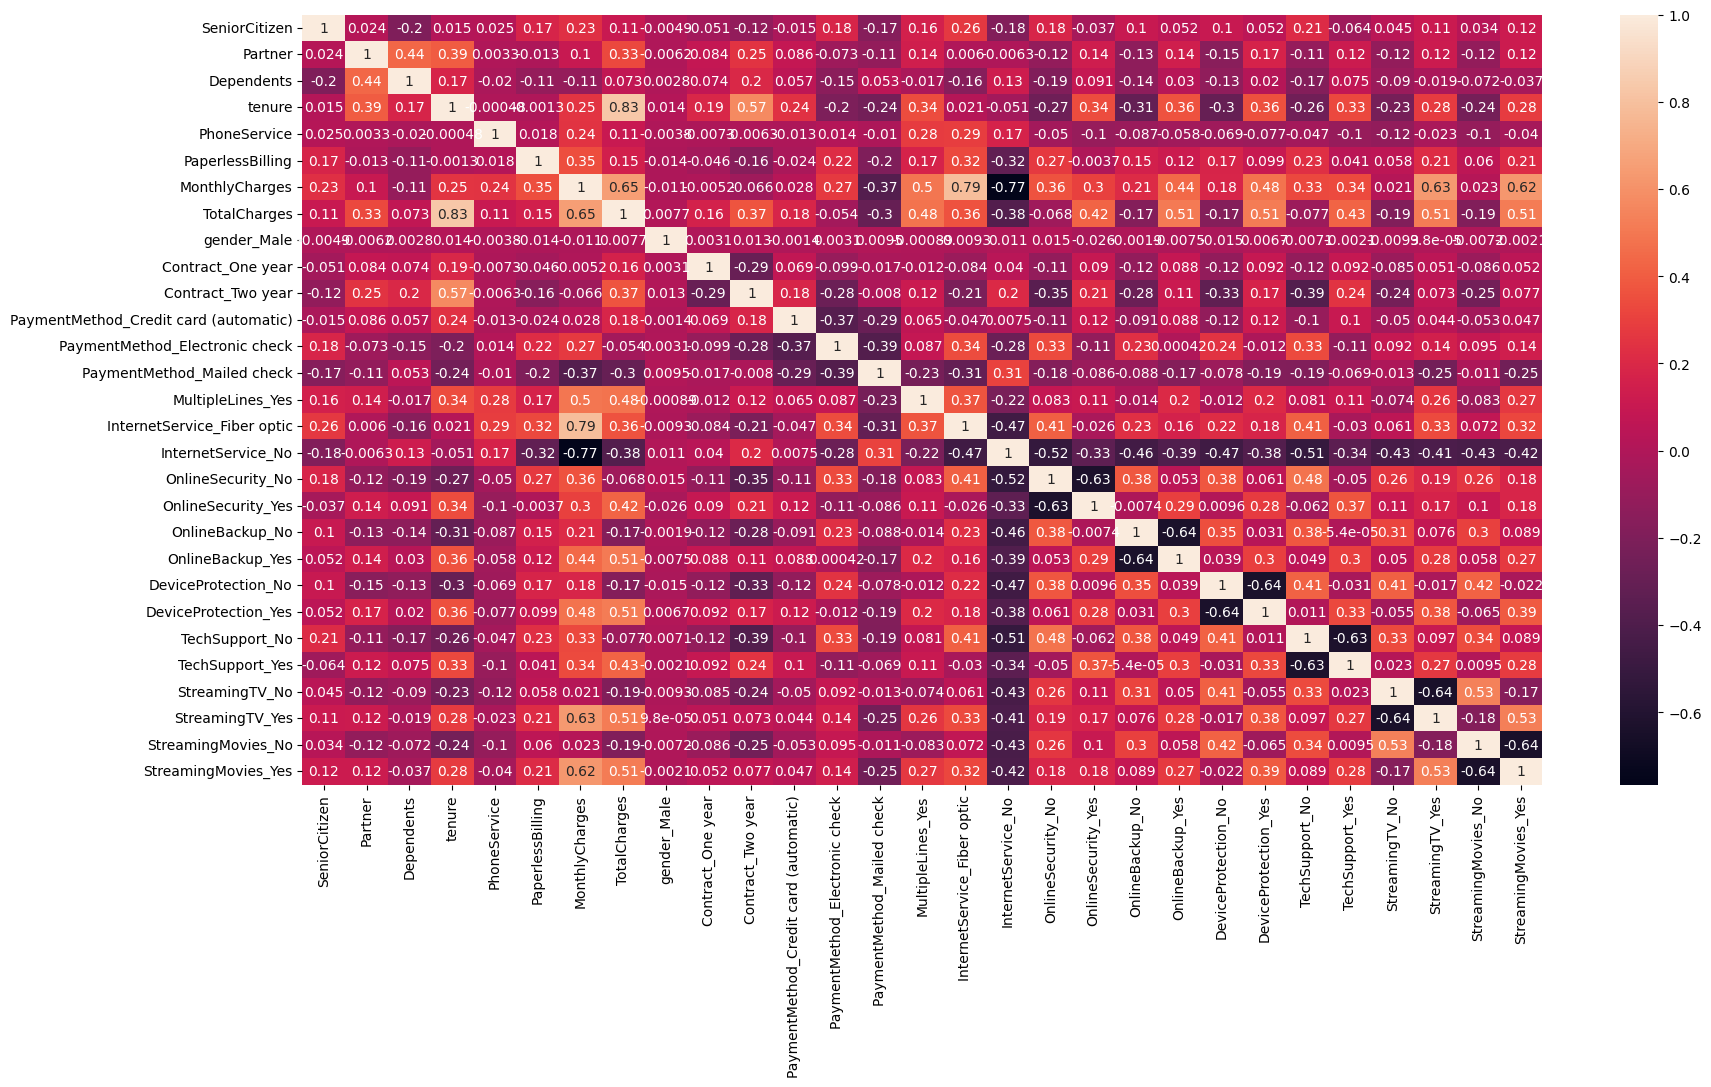

In [504]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

In [671]:
X_train.drop(['StreamingMovies_No','StreamingTV_No','OnlineBackup_No','DeviceProtection_No','OnlineSecurity_No'], axis=1, inplace=True)

In [672]:
X_train.drop(['TechSupport_No'], axis=1, inplace=True)

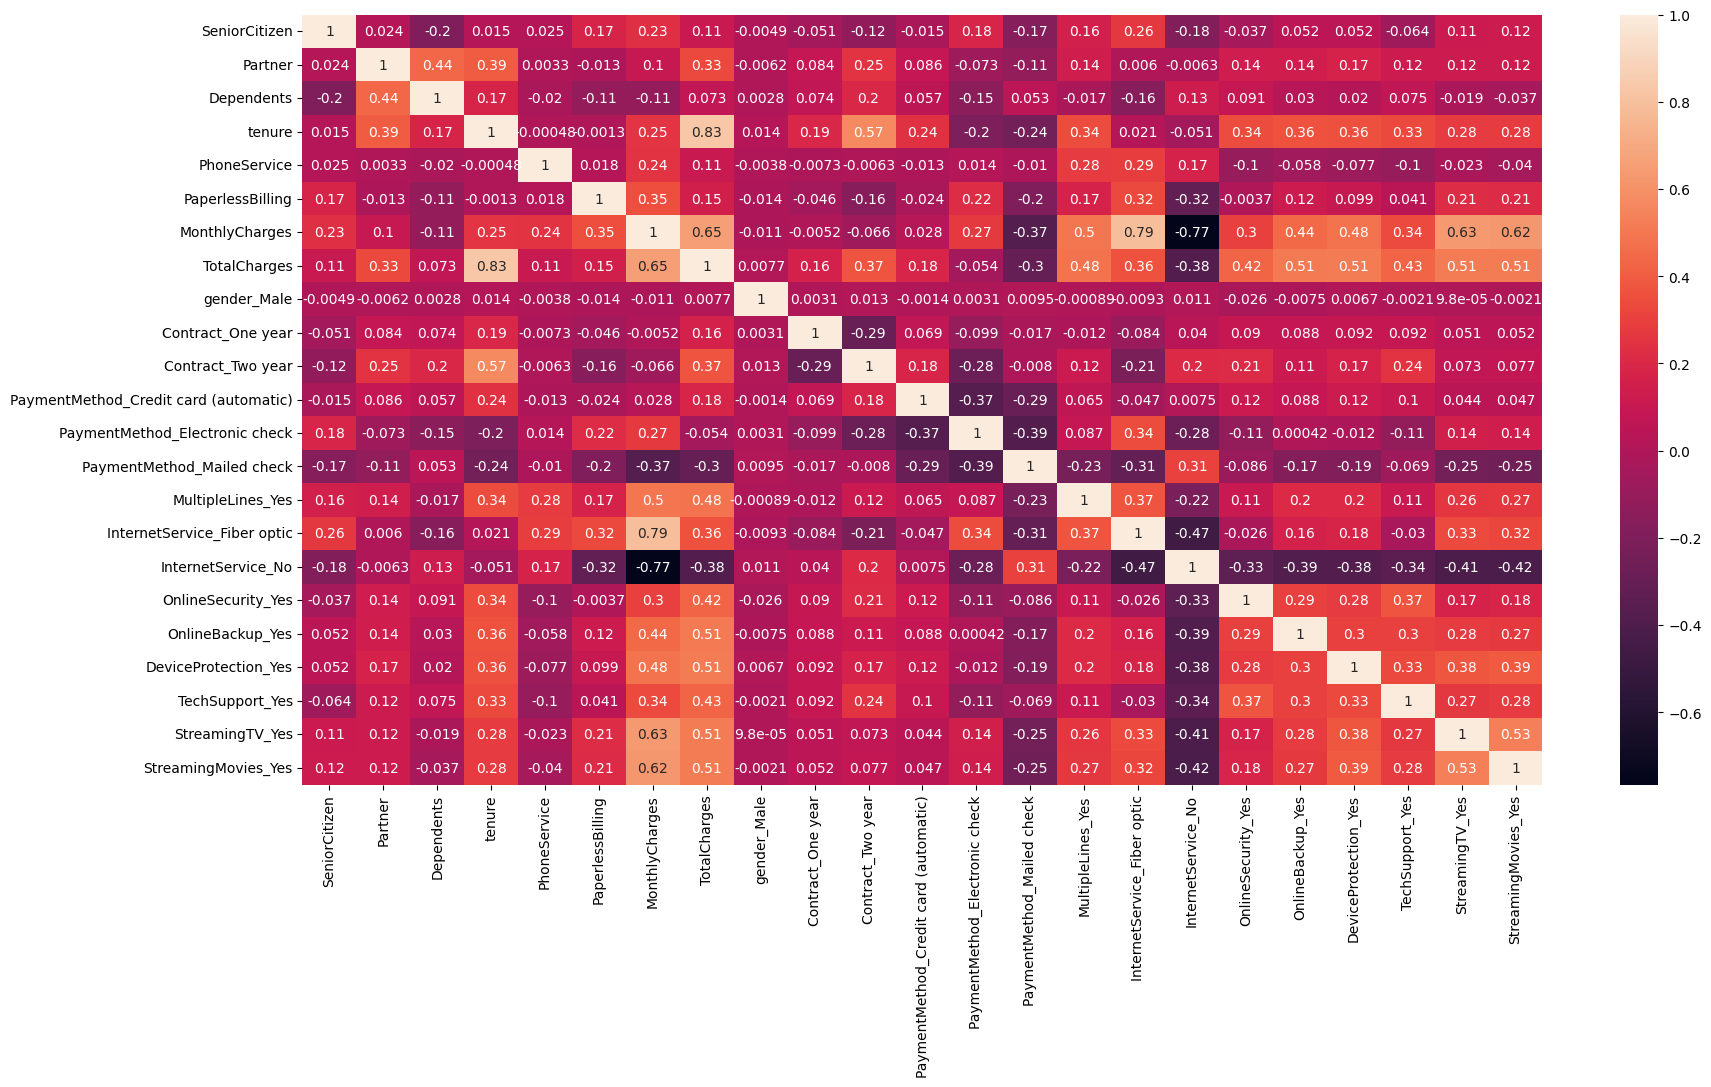

In [507]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

## columns that were dropped
'StreamingMovies_No','StreamingTV_No','OnlineBackup_No','DeviceProtection_No','OnlineSecurity_No', 'TechSupport_No', 'MultipleLines_No phone service', 'StreamingTV_No internet service', 'OnlineSecurity_No internet service','OnlineBackup_No internet service','DeviceProtection_No internet service','TechSupport_No internet service','StreamingMovies_No internet service'


In [673]:
X_train.shape

(4922, 23)

In [674]:
procdata.Churn.sum()

1869

In [675]:
round((procdata.Churn.sum()/len(procdata.index))*100,2)

26.58

In [676]:
import statsmodels.api as sm

In [677]:
X_train

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Male,Contract_One year,...,PaymentMethod_Mailed check,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
879,0,0,0,0.019693,1,1,-0.338074,-0.276449,1,0,...,0,1,0,0,0,1,0,0,0,0
5790,0,1,1,0.305384,0,1,-0.464443,-0.112702,0,0,...,0,0,0,0,0,1,0,0,1,1
6498,0,0,0,-1.286319,1,1,0.581425,-0.974430,0,0,...,0,0,1,0,0,1,1,0,0,0
880,0,0,0,-0.919003,1,1,1.505913,-0.550676,1,0,...,0,0,1,0,1,1,1,1,1,1
2784,0,0,1,-1.163880,1,1,1.106854,-0.835971,0,0,...,0,0,1,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0,1,1,0.509448,1,1,-1.294154,-0.474260,0,1,...,0,1,0,1,0,0,0,0,0,0
3934,0,0,1,-0.919003,0,0,-0.816946,-0.829291,0,1,...,1,0,0,0,1,1,0,1,0,0
5964,0,1,1,0.672699,1,0,-0.101964,0.322781,0,0,...,0,0,0,0,1,0,1,1,0,0
6947,0,1,1,1.448144,1,1,1.204956,1.974736,1,1,...,0,1,1,0,0,1,0,0,1,1


In [678]:
X_train

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Male,Contract_One year,...,PaymentMethod_Mailed check,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
879,0,0,0,0.019693,1,1,-0.338074,-0.276449,1,0,...,0,1,0,0,0,1,0,0,0,0
5790,0,1,1,0.305384,0,1,-0.464443,-0.112702,0,0,...,0,0,0,0,0,1,0,0,1,1
6498,0,0,0,-1.286319,1,1,0.581425,-0.974430,0,0,...,0,0,1,0,0,1,1,0,0,0
880,0,0,0,-0.919003,1,1,1.505913,-0.550676,1,0,...,0,0,1,0,1,1,1,1,1,1
2784,0,0,1,-1.163880,1,1,1.106854,-0.835971,0,0,...,0,0,1,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0,1,1,0.509448,1,1,-1.294154,-0.474260,0,1,...,0,1,0,1,0,0,0,0,0,0
3934,0,0,1,-0.919003,0,0,-0.816946,-0.829291,0,1,...,1,0,0,0,1,1,0,1,0,0
5964,0,1,1,0.672699,1,0,-0.101964,0.322781,0,0,...,0,0,0,0,1,0,1,1,0,0
6947,0,1,1,1.448144,1,1,1.204956,1.974736,1,1,...,0,1,1,0,0,1,0,0,1,1


In [679]:
y_train

879     0
5790    0
6498    1
880     1
2784    1
       ..
79      0
3934    0
5964    0
6947    0
5649    0
Name: Churn, Length: 4922, dtype: int64

In [680]:
smod= sm.add_constant(X_train)

In [681]:
smodel= sm.GLM(y_train, X_train, family = sm.families.Binomial())

In [682]:
smm= smodel.fit()

In [683]:
import warnings
warnings.filterwarnings('ignore')

In [684]:
print(smm.params)

SeniorCitizen                            0.387334
Partner                                  0.040521
Dependents                              -0.151173
tenure                                  -1.495349
PhoneService                            -1.030370
PaperlessBilling                         0.322908
MonthlyCharges                           0.747849
TotalCharges                             0.717241
gender_Male                             -0.041016
Contract_One year                       -0.673680
Contract_Two year                       -1.252961
PaymentMethod_Credit card (automatic)   -0.271940
PaymentMethod_Electronic check           0.147481
PaymentMethod_Mailed check              -0.267724
MultipleLines_Yes                        0.077311
InternetService_Fiber optic              0.086947
InternetService_No                      -0.342839
OnlineSecurity_Yes                      -0.513091
OnlineBackup_Yes                        -0.314291
DeviceProtection_Yes                    -0.169562


In [626]:
print(smm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4899
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2007.9
Date:                Sun, 19 Nov 2023   Deviance:                       4015.9
Time:                        16:03:14   Pearson chi2:                 6.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2834
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [685]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [686]:
VIF= pd.DataFrame()

In [687]:
X_train.shape[1]

23

In [688]:
X_train.values.shape

(4922, 23)

In [689]:
VIF['variables']=X_train.columns
VIF['vif']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]

In [690]:
VIF['vif'] = round(VIF['vif'], 2)

In [691]:
VIF.sort_values(by='vif', ascending=False)

,variables,vif
6,MonthlyCharges,17.81
7,TotalCharges,10.88
4,PhoneService,10.30
15,InternetService_Fiber optic,7.66
3,tenure,7.63
16,InternetService_No,6.91
10,Contract_Two year,3.50
21,StreamingTV_Yes,3.02
22,StreamingMovies_Yes,3.01
5,PaperlessBilling,2.96


In [526]:
X_train.drop('StreamingTV_Yes', axis=1, inplace=True)

In [527]:
smod= sm.add_constant(X_train)
smodel= sm.GLM(y_train, X_train, family = sm.families.Binomial())
smm= smodel.fit()

In [528]:
print(smm.params)

SeniorCitizen                            0.386653
Partner                                  0.039402
Dependents                              -0.151660
tenure                                  -1.493431
PhoneService                            -1.029860
PaperlessBilling                         0.320831
MonthlyCharges                           0.740281
TotalCharges                             0.716003
gender_Male                             -0.041997
Contract_One year                       -0.675947
Contract_Two year                       -1.255361
PaymentMethod_Credit card (automatic)   -0.274664
PaymentMethod_Electronic check           0.144145
PaymentMethod_Mailed check              -0.270684
MultipleLines_Yes                        0.078065
InternetService_Fiber optic              0.092239
InternetService_No                      -0.349116
OnlineSecurity_Yes                      -0.512661
OnlineBackup_Yes                        -0.314283
DeviceProtection_Yes                    -0.170342


In [529]:
print(smm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4900
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2008.0
Date:                Sun, 19 Nov 2023   Deviance:                       4015.9
Time:                        15:46:34   Pearson chi2:                 6.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2834
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [530]:
VIF= pd.DataFrame()
VIF['variables']=X_train.columns
VIF['vif']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
VIF['vif'] = round(VIF['vif'], 2)
VIF.sort_values(by='vif', ascending=False)

,variables,vif
6,MonthlyCharges,15.86
7,TotalCharges,10.88
4,PhoneService,10.29
3,tenure,7.61
15,InternetService_Fiber optic,7.36
16,InternetService_No,6.61
10,Contract_Two year,3.45
21,StreamingMovies_Yes,2.94
5,PaperlessBilling,2.88
12,PaymentMethod_Electronic check,2.83


In [531]:
X_train.drop('Partner', axis=1, inplace=True)

In [532]:
smod= sm.add_constant(X_train)
smodel= sm.GLM(y_train, X_train, family = sm.families.Binomial())
smm= smodel.fit()

In [533]:
print(smm.params)

SeniorCitizen                            0.391095
Dependents                              -0.133650
tenure                                  -1.487137
PhoneService                            -1.023619
PaperlessBilling                         0.321220
MonthlyCharges                           0.731516
TotalCharges                             0.716045
gender_Male                             -0.041569
Contract_One year                       -0.675692
Contract_Two year                       -1.255999
PaymentMethod_Credit card (automatic)   -0.275578
PaymentMethod_Electronic check           0.144466
PaymentMethod_Mailed check              -0.272860
MultipleLines_Yes                        0.079809
InternetService_Fiber optic              0.100877
InternetService_No                      -0.355658
OnlineSecurity_Yes                      -0.511593
OnlineBackup_Yes                        -0.313153
DeviceProtection_Yes                    -0.166063
TechSupport_Yes                         -0.515389


In [534]:
print(smm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4901
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2008.0
Date:                Sun, 19 Nov 2023   Deviance:                       4016.1
Time:                        15:47:29   Pearson chi2:                 6.11e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2834
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [535]:
VIF= pd.DataFrame()
VIF['variables']=X_train.columns
VIF['vif']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
VIF['vif'] = round(VIF['vif'], 2)
VIF.sort_values(by='vif', ascending=False)

,variables,vif
5,MonthlyCharges,15.60
6,TotalCharges,10.88
3,PhoneService,10.15
2,tenure,7.51
14,InternetService_Fiber optic,7.26
15,InternetService_No,6.58
9,Contract_Two year,3.44
20,StreamingMovies_Yes,2.91
4,PaperlessBilling,2.88
11,PaymentMethod_Electronic check,2.82


In [692]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [697]:
lr = LogisticRegression()
rfe = RFE(lr,n_features_to_select=15)
rfs=rfe.fit(X_train, y_train)

In [698]:
rfs.support_

array([ True, False, False,  True, False,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True, False,
       False, False,  True,  True,  True])

In [699]:
X_train.columns[rfs.support_]

Index(['SeniorCitizen', 'tenure', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [700]:
list(zip(X_train.columns, rfs.ranking_, rfs.support_))

[('SeniorCitizen', 1, True),
 ('Partner', 7, False),
 ('Dependents', 6, False),
 ('tenure', 1, True),
 ('PhoneService', 3, False),
 ('PaperlessBilling', 1, True),
 ('MonthlyCharges', 1, True),
 ('TotalCharges', 1, True),
 ('gender_Male', 8, False),
 ('Contract_One year', 1, True),
 ('Contract_Two year', 1, True),
 ('PaymentMethod_Credit card (automatic)', 1, True),
 ('PaymentMethod_Electronic check', 4, False),
 ('PaymentMethod_Mailed check', 1, True),
 ('MultipleLines_Yes', 1, True),
 ('InternetService_Fiber optic', 1, True),
 ('InternetService_No', 1, True),
 ('OnlineSecurity_Yes', 2, False),
 ('OnlineBackup_Yes', 5, False),
 ('DeviceProtection_Yes', 9, False),
 ('TechSupport_Yes', 1, True),
 ('StreamingTV_Yes', 1, True),
 ('StreamingMovies_Yes', 1, True)]

In [701]:
cols= X_train.columns[rfs.support_]

In [702]:
cols

Index(['SeniorCitizen', 'tenure', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [703]:
X_train.columns[~rfs.support_]

Index(['Partner', 'Dependents', 'PhoneService', 'gender_Male',
       'PaymentMethod_Electronic check', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_Yes'],
      dtype='object')

In [704]:
X_train[cols]

,SeniorCitizen,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
879,0,0.019693,1,-0.338074,-0.276449,0,0,0,0,1,0,0,0,0,0
5790,0,0.305384,1,-0.464443,-0.112702,0,0,0,0,0,0,0,0,1,1
6498,0,-1.286319,1,0.581425,-0.974430,0,0,0,0,0,1,0,0,0,0
880,0,-0.919003,1,1.505913,-0.550676,0,0,0,0,0,1,0,1,1,1
2784,0,-1.163880,1,1.106854,-0.835971,0,0,0,0,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0,0.509448,1,-1.294154,-0.474260,1,0,1,0,1,0,1,0,0,0
3934,0,-0.919003,0,-0.816946,-0.829291,1,0,0,1,0,0,0,1,0,0
5964,0,0.672699,0,-0.101964,0.322781,0,0,0,0,0,0,0,1,0,0
6947,0,1.448144,1,1.204956,1.974736,1,0,1,0,1,1,0,0,1,1


In [648]:
X_train

,SeniorCitizen,tenure,PhoneService,PaperlessBilling,TotalCharges,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,TechSupport_Yes
879,0,0.019693,1,1,-0.276449,0,0,0,0,0,0
5790,0,0.305384,0,1,-0.112702,0,0,0,0,0,0
6498,0,-1.286319,1,1,-0.974430,0,0,1,0,0,0
880,0,-0.919003,1,1,-0.550676,0,0,1,0,1,1
2784,0,-1.163880,1,1,-0.835971,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
79,0,0.509448,1,1,-0.474260,1,0,0,1,0,0
3934,0,-0.919003,0,0,-0.829291,1,0,0,0,1,1
5964,0,0.672699,1,0,0.322781,0,0,0,0,1,1
6947,0,1.448144,1,1,1.974736,1,0,1,0,0,0


In [705]:
smodel= sm.GLM(y_train, sm.add_constant(X_train[cols]), family = sm.families.Binomial())
smm= smodel.fit()

In [706]:
print(smm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.1
Date:                Sun, 19 Nov 2023   Deviance:                       4022.2
Time:                        16:18:27   Pearson chi2:                 6.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2825
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [707]:
smm.params

const                                   -2.246193
SeniorCitizen                            0.429553
tenure                                  -1.559641
PaperlessBilling                         0.343550
MonthlyCharges                          -0.969204
TotalCharges                             0.742071
Contract_One year                       -0.683017
Contract_Two year                       -1.293127
PaymentMethod_Credit card (automatic)   -0.372400
PaymentMethod_Mailed check              -0.372325
MultipleLines_Yes                        0.377906
InternetService_Fiber optic              1.586475
InternetService_No                      -1.689742
TechSupport_Yes                         -0.240820
StreamingTV_Yes                          0.579635
StreamingMovies_Yes                      0.466516
dtype: float64

In [711]:
y_train_pred = smm.predict(sm.add_constant(X_train[cols]))

In [718]:
y_train_pred

879     0.192642
5790    0.275624
6498    0.599507
880     0.513571
2784    0.648233
          ...   
79      0.015336
3934    0.126458
5964    0.039247
6947    0.129142
5649    0.031459
Length: 4922, dtype: float64

In [716]:
procdata.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,...,0,1,0,0,1,0,0,1,0,0
1,5575-GNVDE,0,0,0,34,1,0,56.95,1889.50,0,...,1,1,0,0,1,0,0,1,0,0
2,3668-QPYBK,0,0,0,2,1,1,53.85,108.15,1,...,0,1,0,0,1,0,0,1,0,0
3,7795-CFOCW,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,1,1,0,0,1,0,0
4,9237-HQITU,0,0,0,2,1,1,70.70,151.65,1,...,0,1,0,0,1,0,0,1,0,0


In [717]:
procdata.Churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [714]:
procdata.customerID

0       7590-VHVEG
1       5575-GNVDE
2       3668-QPYBK
3       7795-CFOCW
4       9237-HQITU
           ...    
7038    6840-RESVB
7039    2234-XADUH
7040    4801-JZAZL
7041    8361-LTMKD
7042    3186-AJIEK
Name: customerID, Length: 7032, dtype: object

In [724]:
rest = pd.DataFrame({'Churn': y_train.values, 'prob': y_train_pred})

In [726]:
y_train_pred

879     0.192642
5790    0.275624
6498    0.599507
880     0.513571
2784    0.648233
          ...   
79      0.015336
3934    0.126458
5964    0.039247
6947    0.129142
5649    0.031459
Length: 4922, dtype: float64

In [729]:
y_train_pred= y_train_pred.values.reshape(-1)

In [730]:
rest = pd.DataFrame({'Churn': y_train.values, 'prob': y_train_pred})

In [739]:
rest['custid']= y_train.index

In [745]:
rest['pred_churn']= rest['prob'].apply(lambda x: 1 if x > 0.5 else 0)

In [746]:
rest

,Churn,prob,custid,pred_churn
0,0,0.192642,879,0
1,0,0.275624,5790,0
2,1,0.599507,6498,1
3,1,0.513571,880,1
4,1,0.648233,2784,1
...,...,...,...,...
4917,0,0.015336,79,0
4918,0,0.126458,3934,0
4919,0,0.039247,5964,0
4920,0,0.129142,6947,0


In [748]:
from sklearn.metrics import confusion_matrix

In [752]:
cm =confusion_matrix(rest.Churn, rest.pred_churn)

In [753]:
cm

array([[3275,  360],
       [ 574,  713]], dtype=int64)

In [754]:
# 00 = 3275 TN
# 01 = 360 FP
# 10 = 574 FN
# 11 = 713 TP

In [756]:
from sklearn.metrics import accuracy_score

In [758]:
accuracy_score(rest.Churn, rest.pred_churn)

0.8102397399431126

In [759]:
X_train

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Male,Contract_One year,...,PaymentMethod_Mailed check,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
879,0,0,0,0.019693,1,1,-0.338074,-0.276449,1,0,...,0,1,0,0,0,1,0,0,0,0
5790,0,1,1,0.305384,0,1,-0.464443,-0.112702,0,0,...,0,0,0,0,0,1,0,0,1,1
6498,0,0,0,-1.286319,1,1,0.581425,-0.974430,0,0,...,0,0,1,0,0,1,1,0,0,0
880,0,0,0,-0.919003,1,1,1.505913,-0.550676,1,0,...,0,0,1,0,1,1,1,1,1,1
2784,0,0,1,-1.163880,1,1,1.106854,-0.835971,0,0,...,0,0,1,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0,1,1,0.509448,1,1,-1.294154,-0.474260,0,1,...,0,1,0,1,0,0,0,0,0,0
3934,0,0,1,-0.919003,0,0,-0.816946,-0.829291,0,1,...,1,0,0,0,1,1,0,1,0,0
5964,0,1,1,0.672699,1,0,-0.101964,0.322781,0,0,...,0,0,0,0,1,0,1,1,0,0
6947,0,1,1,1.448144,1,1,1.204956,1.974736,1,1,...,0,1,1,0,0,1,0,0,1,1


In [761]:
X_train[cols]

,SeniorCitizen,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
879,0,0.019693,1,-0.338074,-0.276449,0,0,0,0,1,0,0,0,0,0
5790,0,0.305384,1,-0.464443,-0.112702,0,0,0,0,0,0,0,0,1,1
6498,0,-1.286319,1,0.581425,-0.974430,0,0,0,0,0,1,0,0,0,0
880,0,-0.919003,1,1.505913,-0.550676,0,0,0,0,0,1,0,1,1,1
2784,0,-1.163880,1,1.106854,-0.835971,0,0,0,0,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0,0.509448,1,-1.294154,-0.474260,1,0,1,0,1,0,1,0,0,0
3934,0,-0.919003,0,-0.816946,-0.829291,1,0,0,1,0,0,0,1,0,0
5964,0,0.672699,0,-0.101964,0.322781,0,0,0,0,0,0,0,1,0,0
6947,0,1.448144,1,1.204956,1.974736,1,0,1,0,1,1,0,0,1,1


In [763]:
X_train[cols].values

array([[ 0.        ,  0.01969334,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.30538352,  1.        , ...,  0.        ,
         1.        ,  1.        ],
       [ 0.        , -1.28631894,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.67269947,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.44814426,  1.        , ...,  0.        ,
         1.        ,  1.        ],
       [ 0.        ,  0.01969334,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [764]:
VIF= pd.DataFrame()
VIF['variables']=X_train[cols].columns
VIF['vif']=[variance_inflation_factor(X_train[cols].values,i) for i in range(X_train[cols].shape[1])]
VIF['vif'] = round(VIF['vif'], 2)
VIF.sort_values(by='vif', ascending=False)

,variables,vif
3,MonthlyCharges,14.85
4,TotalCharges,10.42
1,tenure,7.38
10,InternetService_Fiber optic,5.61
11,InternetService_No,5.27
6,Contract_Two year,3.14
13,StreamingTV_Yes,2.79
14,StreamingMovies_Yes,2.79
2,PaperlessBilling,2.76
9,MultipleLines_Yes,2.38


In [766]:
newtrain = X_train[cols].drop('TechSupport_Yes', axis=1)

In [767]:
newtrain

,SeniorCitizen,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,StreamingTV_Yes,StreamingMovies_Yes
879,0,0.019693,1,-0.338074,-0.276449,0,0,0,0,1,0,0,0,0
5790,0,0.305384,1,-0.464443,-0.112702,0,0,0,0,0,0,0,1,1
6498,0,-1.286319,1,0.581425,-0.974430,0,0,0,0,0,1,0,0,0
880,0,-0.919003,1,1.505913,-0.550676,0,0,0,0,0,1,0,1,1
2784,0,-1.163880,1,1.106854,-0.835971,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0,0.509448,1,-1.294154,-0.474260,1,0,1,0,1,0,1,0,0
3934,0,-0.919003,0,-0.816946,-0.829291,1,0,0,1,0,0,0,0,0
5964,0,0.672699,0,-0.101964,0.322781,0,0,0,0,0,0,0,0,0
6947,0,1.448144,1,1.204956,1.974736,1,0,1,0,1,1,0,1,1


In [768]:
smodel= sm.GLM(y_train, sm.add_constant(newtrain), family = sm.families.Binomial())
smm= smodel.fit()

In [769]:
print(smm.params)

const                                   -2.417101
SeniorCitizen                            0.439715
tenure                                  -1.566799
PaperlessBilling                         0.339256
MonthlyCharges                          -1.128638
TotalCharges                             0.743815
Contract_One year                       -0.700910
Contract_Two year                       -1.350986
PaymentMethod_Credit card (automatic)   -0.375501
PaymentMethod_Mailed check              -0.385232
MultipleLines_Yes                        0.417966
InternetService_Fiber optic              1.775247
InternetService_No                      -1.747540
StreamingTV_Yes                          0.622133
StreamingMovies_Yes                      0.503895
dtype: float64


In [770]:
print(smm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2013.6
Date:                Sun, 19 Nov 2023   Deviance:                       4027.1
Time:                        16:55:33   Pearson chi2:                 6.29e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2818
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [771]:
VIF= pd.DataFrame()
VIF['variables']=newtrain.columns
VIF['vif']=[variance_inflation_factor(newtrain.values,i) for i in range(newtrain.shape[1])]
VIF['vif'] = round(VIF['vif'], 2)
VIF.sort_values(by='vif', ascending=False)

,variables,vif
3,MonthlyCharges,14.82
4,TotalCharges,10.36
1,tenure,7.31
10,InternetService_Fiber optic,5.53
11,InternetService_No,5.18
6,Contract_Two year,2.82
12,StreamingTV_Yes,2.78
13,StreamingMovies_Yes,2.77
2,PaperlessBilling,2.70
9,MultipleLines_Yes,2.37


In [772]:
y_train_prednew= smm.predict(sm.add_constant(newtrain))

In [777]:
y_train_prednew= y_train_prednew.values.reshape(-1)

In [778]:
rest = pd.DataFrame({'Churn': y_train.values, 'prob': y_train_prednew})
rest['custid']= y_train.index
rest['pred_churn']= rest['prob'].apply(lambda x: 1 if x > 0.5 else 0)

In [780]:
rest

,Churn,prob,custid,pred_churn
0,0,0.180229,879,0
1,0,0.270925,5790,0
2,1,0.582195,6498,1
3,1,0.538447,880,1
4,1,0.684807,2784,1
...,...,...,...,...
4917,0,0.015155,79,0
4918,0,0.147022,3934,0
4919,0,0.042455,5964,0
4920,0,0.119720,6947,0


In [781]:
cm =confusion_matrix(rest.Churn, rest.pred_churn)

In [782]:
cm

array([[3274,  361],
       [ 580,  707]], dtype=int64)

In [784]:
# 00 = 3275 TN
# 01 = 360 FP
# 10 = 574 FN
# 11 = 713 TP

# new

# 00 = 3274 TN
# 01 = 361 FP
# 10 = 580 FN
# 11 = 707 TP

In [785]:
accuracy_score(rest.Churn, rest.pred_churn)

0.8088175538399025

In [786]:
VIF= pd.DataFrame()
VIF['variables']=newtrain.columns
VIF['vif']=[variance_inflation_factor(newtrain.values,i) for i in range(newtrain.shape[1])]
VIF['vif'] = round(VIF['vif'], 2)
VIF.sort_values(by='vif', ascending=False)

,variables,vif
3,MonthlyCharges,14.82
4,TotalCharges,10.36
1,tenure,7.31
10,InternetService_Fiber optic,5.53
11,InternetService_No,5.18
6,Contract_Two year,2.82
12,StreamingTV_Yes,2.78
13,StreamingMovies_Yes,2.77
2,PaperlessBilling,2.70
9,MultipleLines_Yes,2.37


In [787]:
newtrain.drop('MonthlyCharges', axis=1, inplace=True)

In [788]:
smodel= sm.GLM(y_train, sm.add_constant(newtrain), family = sm.families.Binomial())
smm= smodel.fit()

In [789]:
print(smm.params)

const                                   -1.731221
SeniorCitizen                            0.487339
tenure                                  -1.258069
PaperlessBilling                         0.347606
TotalCharges                             0.325676
Contract_One year                       -0.781067
Contract_Two year                       -1.455119
PaymentMethod_Credit card (automatic)   -0.399328
PaymentMethod_Mailed check              -0.383937
MultipleLines_Yes                        0.181966
InternetService_Fiber optic              0.776254
InternetService_No                      -0.825663
StreamingTV_Yes                          0.276745
StreamingMovies_Yes                      0.179151
dtype: float64


In [790]:
print(smm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2032.5
Date:                Sun, 19 Nov 2023   Deviance:                       4065.0
Time:                        17:07:15   Pearson chi2:                 5.73e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2763
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [791]:
VIF= pd.DataFrame()
VIF['variables']=newtrain.columns
VIF['vif']=[variance_inflation_factor(newtrain.values,i) for i in range(newtrain.shape[1])]
VIF['vif'] = round(VIF['vif'], 2)
VIF.sort_values(by='vif', ascending=False)

,variables,vif
3,TotalCharges,7.36
1,tenure,6.81
9,InternetService_Fiber optic,2.92
5,Contract_Two year,2.76
12,StreamingMovies_Yes,2.59
11,StreamingTV_Yes,2.57
2,PaperlessBilling,2.50
10,InternetService_No,2.30
8,MultipleLines_Yes,2.27
4,Contract_One year,1.68


In [792]:
newtrain.drop('TotalCharges', axis=1, inplace=True)

In [793]:
smodel= sm.GLM(y_train, sm.add_constant(newtrain), family = sm.families.Binomial())
smm= smodel.fit()

In [794]:
print(smm.params)

const                                   -1.769852
SeniorCitizen                            0.488161
tenure                                  -0.966896
PaperlessBilling                         0.342380
Contract_One year                       -0.773110
Contract_Two year                       -1.422817
PaymentMethod_Credit card (automatic)   -0.398804
PaymentMethod_Mailed check              -0.359272
MultipleLines_Yes                        0.211201
InternetService_Fiber optic              0.860165
InternetService_No                      -0.844279
StreamingTV_Yes                          0.316237
StreamingMovies_Yes                      0.216880
dtype: float64


In [795]:
print(smm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4909
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2034.1
Date:                Sun, 19 Nov 2023   Deviance:                       4068.2
Time:                        17:09:11   Pearson chi2:                 5.28e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2758
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [796]:
VIF= pd.DataFrame()
VIF['variables']=newtrain.columns
VIF['vif']=[variance_inflation_factor(newtrain.values,i) for i in range(newtrain.shape[1])]
VIF['vif'] = round(VIF['vif'], 2)
VIF.sort_values(by='vif', ascending=False)

,variables,vif
4,Contract_Two year,2.70
8,InternetService_Fiber optic,2.65
11,StreamingMovies_Yes,2.50
10,StreamingTV_Yes,2.48
2,PaperlessBilling,2.42
7,MultipleLines_Yes,2.24
1,tenure,2.04
9,InternetService_No,1.82
3,Contract_One year,1.67
6,PaymentMethod_Mailed check,1.58


In [797]:
y_train_prednew= smm.predict(sm.add_constant(newtrain))

In [798]:
y_train_prednew = y_train_prednew.values.reshape(-1)
rest = pd.DataFrame({'Churn': y_train.values, 'prob': y_train_prednew})
rest['custid']= y_train.index
rest['pred_churn']= rest['prob'].apply(lambda x: 1 if x > 0.5 else 0)

In [799]:
rest

,Churn,prob,custid,pred_churn
0,0,0.225253,879,0
1,0,0.233325,5790,0
2,1,0.662941,6498,1
3,1,0.701487,880,1
4,1,0.748600,2784,1
...,...,...,...,...
4917,0,0.023544,79,0
4918,0,0.117777,3934,0
4919,0,0.081639,5964,0
4920,0,0.083546,6947,0


In [800]:
accuracy_score(rest.Churn, rest.pred_churn)

0.802519301097115

In [801]:
cm =confusion_matrix(rest.Churn, rest.pred_churn)

In [802]:
cm

array([[3279,  356],
       [ 616,  671]], dtype=int64)

In [804]:
# 00 = 3275 TN
# 01 = 360 FP
# 10 = 574 FN
# 11 = 713 TP

# new

# 00 = 3274 TN
# 01 = 361 FP
# 10 = 580 FN
# 11 = 707 TP

#new

# 00 =3279
TN = 3279
# 01 =356
FP = 356
# 10 = 616
FN = 616
# 11 = 671
TP = 671

In [805]:
sensitivity = TP / (FN + TP)

In [806]:
specificity = TN / (TN + FP)

In [807]:
print(sensitivity)
print(specificity)

0.5213675213675214
0.9020632737276478


In [809]:
# truepostiverate= sensitivity

In [812]:
falsepositiverate = FP /(TN + FP)

In [813]:
print(falsepositiverate)

0.09793672627235213


In [814]:
from sklearn.metrics import roc_curve

In [816]:
from sklearn.metrics import roc_auc_score

In [854]:
def draw_roc(act, prob):
      fpr, tpr, thresholds = roc_curve(act, prob, drop_intermediate=True)
      auc = roc_auc_score(act, prob)
      plt.figure(figsize=(7,6))
      plt.title("Receiver Operting Charecteristic Curve- FPR vs TPR")
      plt.plot(fpr, tpr, label= "aucscore = %0.2f" % auc)
      plt.plot([0,1],[0,1], 'k--')
      plt.xlim([0.0, 1.0])
      plt.ylim([0.0, 1.05])
      plt.xlabel("False Positive Rate")
      plt.ylabel("True Positive Rate")
      plt.legend(loc="lower right")

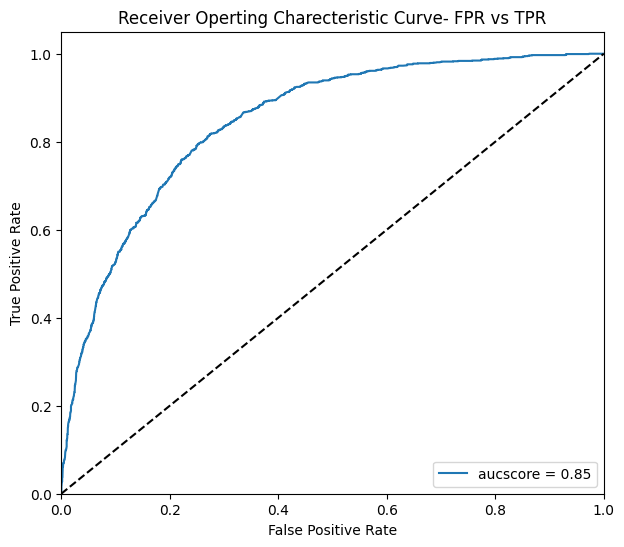

In [855]:
draw_roc(rest.Churn, rest.prob)

In [850]:
fpr, tpr, thresholds = roc_curve(rest.Churn, rest.prob, drop_intermediate=True)

In [858]:
thres = [float(i/10) for i in range(11)]

In [860]:
rest

,Churn,prob,custid,pred_churn
0,0,0.225253,879,0
1,0,0.233325,5790,0
2,1,0.662941,6498,1
3,1,0.701487,880,1
4,1,0.748600,2784,1
...,...,...,...,...
4917,0,0.023544,79,0
4918,0,0.117777,3934,0
4919,0,0.081639,5964,0
4920,0,0.083546,6947,0


In [859]:
thres

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [861]:
for i in thres:
    rest[i]= rest['prob'].apply(lambda x: 1 if x>i else 0)

In [862]:
rest

,Churn,prob,custid,pred_churn,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
0,0,0.225253,879,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.233325,5790,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.662941,6498,1,1,1,1,1,1,1,1,0,0,0,0
3,1,0.701487,880,1,1,1,1,1,1,1,1,1,0,0,0
4,1,0.748600,2784,1,1,1,1,1,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4917,0,0.023544,79,0,1,0,0,0,0,0,0,0,0,0,0
4918,0,0.117777,3934,0,1,1,0,0,0,0,0,0,0,0,0
4919,0,0.081639,5964,0,1,0,0,0,0,0,0,0,0,0,0
4920,0,0.083546,6947,0,1,0,0,0,0,0,0,0,0,0,0


In [863]:
val=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [866]:
y_train.index

Index([ 879, 5790, 6498,  880, 2784, 3874, 5387, 6623, 4465, 5364,
       ...
       4156, 1895, 6077,  350, 6035,   79, 3934, 5964, 6947, 5649],
      dtype='int64', length=4922)

In [893]:
eval = pd.DataFrame(columns=['prob', 'sensitivity', 'specificity', 'accuracy'], index=val)

In [886]:
eval.loc[:,'prob']=[1]

In [892]:
eval

,prob,sensitivity,specificity,accuracy
0.0,NaN,NaN,NaN,NaN
0.1,0.1,23,45,5
0.2,NaN,NaN,NaN,NaN
0.3,NaN,NaN,NaN,NaN
0.4,NaN,NaN,NaN,NaN
0.5,NaN,NaN,NaN,NaN
0.6,NaN,NaN,NaN,NaN
0.7,NaN,NaN,NaN,NaN
0.8,NaN,NaN,NaN,NaN
0.9,NaN,NaN,NaN,NaN


In [894]:
for i in val:
    accuracy = accuracy_score(rest.Churn, rest[i])
    cm = confusion_matrix(rest.Churn, rest[i])
    sens = round(cm[1,1]/(cm[1,0]+cm[1,1]),2)
    spec = round(cm[0,0]/(cm[0,0]+cm[0,1]),2)
    eval.loc[i]=[i, sens, spec, accuracy] 
    

In [869]:
cm

array([[3279,  356],
       [ 616,  671]], dtype=int64)

In [872]:
cm[0,0]

3279

In [873]:
# 00 3279: TN [0,0]
# 01 356: FP  [0,1]
# 10 616: FN [1,0]
#11 671: TP  [1,1]

In [878]:
sens = round(cm[1,1]/(cm[1,0]+cm[1,1]),2)

In [879]:
sens

0.52

In [895]:
eval

,prob,sensitivity,specificity,accuracy
0.0,0.0,1.0,0.0,0.261479
0.1,0.1,0.94,0.5,0.613572
0.2,0.2,0.86,0.67,0.718813
0.3,0.3,0.77,0.77,0.76859
0.4,0.4,0.64,0.84,0.790126
0.5,0.5,0.52,0.9,0.802519
0.6,0.6,0.38,0.94,0.796627
0.7,0.7,0.2,0.98,0.777123
0.8,0.8,0.04,1.0,0.746851
0.9,0.9,0.0,1.0,0.738521


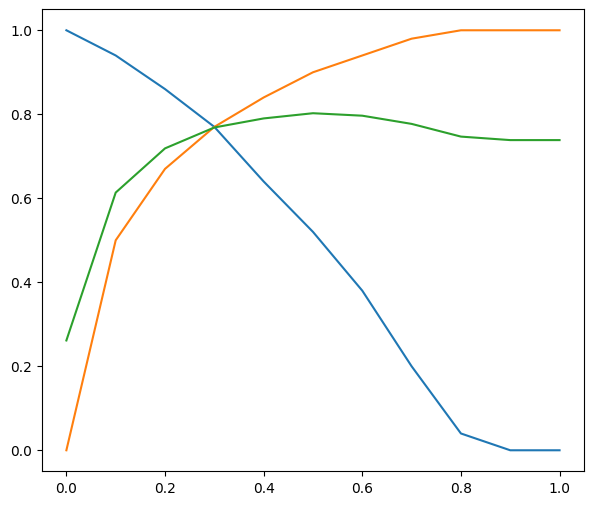

In [906]:
plt.figure(figsize=(7,6))
plt.plot(eval.prob, eval[['sensitivity', 'specificity', 'accuracy']])
plt.show()

<Axes: xlabel='prob'>

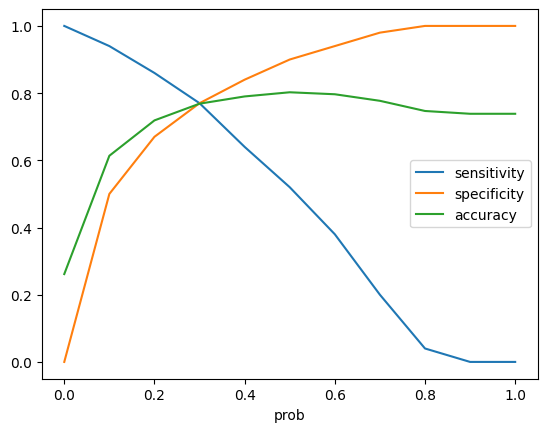

In [907]:
eval.plot.line(x='prob', y=['sensitivity', 'specificity', 'accuracy'])

In [909]:
X_train

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Male,Contract_One year,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
942,0,0,0,24,1,1,79.85,2001.00,1,0,...,0,1,0,0,1,0,0,0,0,1
3730,0,1,0,57,1,1,104.50,5921.35,0,0,...,1,1,0,0,0,0,1,0,0,1
1761,0,0,0,58,1,1,24.45,1513.60,1,0,...,0,0,1,0,0,1,0,0,1,0
2283,0,0,0,1,1,1,71.55,71.55,1,0,...,0,1,0,0,1,0,0,1,0,0
1872,0,1,1,41,1,0,19.70,804.25,0,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,0,0,0,63,1,0,68.80,4111.35,1,1,...,1,0,0,1,1,0,0,1,0,0
3508,0,0,0,70,1,1,113.65,7939.25,0,0,...,1,0,0,1,0,0,1,0,0,1
6765,0,1,1,69,1,1,25.60,1673.40,0,0,...,0,0,1,0,0,1,0,0,1,0
3598,1,0,0,1,1,0,46.30,46.30,1,0,...,0,1,0,0,1,0,0,1,0,0


In [990]:
precision_score(rest.Churn, rest.pred_churn)

0.6533592989289192

In [991]:
recall_score(rest.Churn, rest.pred_churn)

0.5213675213675214

In [993]:
ps, rc, thresholds =precision_recall_curve(rest.Churn, rest.prob, drop_intermediate=True)

array([0.26147907, 0.26684636, 0.26680498, ..., 1.        , 1.        ,
       1.        ])

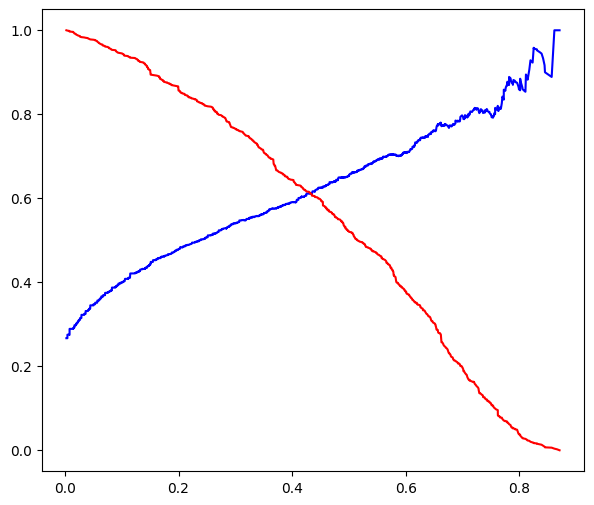

In [997]:
plt.figure(figsize=(7,6))
plt.plot(thresholds, ps[1:], 'b')
plt.plot(thresholds, rc[1:], 'r')
plt.show()

'StreamingMovies_No','StreamingTV_No','OnlineBackup_No','DeviceProtection_No','OnlineSecurity_No', 'TechSupport_No', 'MultipleLines_No phone service', 'StreamingTV_No internet service', 'OnlineSecurity_No internet service','OnlineBackup_No internet service','DeviceProtection_No internet service','TechSupport_No internet service','StreamingMovies_No internet service'

'SeniorCitizen', 'tenure', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'

StreamingTV_Yes, TechSupport_Yes, 'TotalCharges',

In [954]:
cols=newtrain.columns

In [948]:
X_test.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Male,Contract_One year,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
942,0,0,0,24,1,1,79.85,2001.00,1,0,...,0,1,0,0,1,0,0,0,0,1
3730,0,1,0,57,1,1,104.50,5921.35,0,0,...,1,1,0,0,0,0,1,0,0,1
1761,0,0,0,58,1,1,24.45,1513.60,1,0,...,0,0,1,0,0,1,0,0,1,0
2283,0,0,0,1,1,1,71.55,71.55,1,0,...,0,1,0,0,1,0,0,1,0,0
1872,0,1,1,41,1,0,19.70,804.25,0,0,...,0,0,1,0,0,1,0,0,1,0


In [949]:
ncols=['tenure', 'MonthlyCharges', 'TotalCharges']

In [950]:
X_test[ncols]

,tenure,MonthlyCharges,TotalCharges
942,24,79.85,2001.00
3730,57,104.50,5921.35
1761,58,24.45,1513.60
2283,1,71.55,71.55
1872,41,19.70,804.25
...,...,...,...
1289,63,68.80,4111.35
3508,70,113.65,7939.25
6765,69,25.60,1673.40
3598,1,46.30,46.30


In [952]:
X_test[ncols]=scaler.transform(X_test[ncols])

In [953]:
X_test.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Male,Contract_One year,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
942,0,0,0,-0.347623,1,1,0.499951,-0.128378,1,0,...,0,1,0,0,1,0,0,0,0,1
3730,0,1,0,0.999203,1,1,1.319685,1.600302,0,0,...,1,1,0,0,0,0,1,0,0,1
1761,0,0,0,1.040015,1,1,-1.342374,-0.343297,1,0,...,0,0,1,0,0,1,0,0,1,0
2283,0,0,0,-1.286319,1,1,0.223935,-0.979170,1,0,...,0,1,0,0,1,0,0,1,0,0
1872,0,1,1,0.346196,1,0,-1.500335,-0.656086,0,0,...,0,0,1,0,0,1,0,0,1,0


In [963]:
X_test =X_test[cols]

In [964]:
X_test

,SeniorCitizen,tenure,PaperlessBilling,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,StreamingTV_Yes,StreamingMovies_Yes
942,0,-0.347623,1,0,0,1,0,0,1,0,0,1
3730,0,0.999203,1,0,0,1,0,1,1,0,1,1
1761,0,1.040015,1,0,1,1,0,1,0,1,0,0
2283,0,-1.286319,1,0,0,0,1,0,1,0,0,0
1872,0,0.346196,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,0,1.244080,0,1,0,0,0,1,0,0,0,0
3508,0,1.529770,1,0,1,0,0,1,1,0,1,1
6765,0,1.488957,1,0,1,0,0,1,0,1,0,0
3598,1,-1.286319,0,0,0,0,0,0,0,0,0,0


In [965]:
y_test_pred = smm.predict(sm.add_constant(X_test))

In [968]:
y_test_pred= y_test_pred.values.reshape(-1,1)

In [967]:
test= pd.DataFrame()

In [969]:
test['churn']=y_test.values
test['pred_churn']= y_test_pred


In [971]:
test['custid']=y_test.index

In [972]:
test

,churn,pred_churn,custid
0,0,0.398165,942
1,1,0.233631,3730
2,0,0.007482,1761
3,1,0.578631,2283
4,0,0.012472,1872
...,...,...,...
2105,0,0.028342,1289
2106,0,0.061518,3508
2107,0,0.007224,6765
2108,0,0.490513,3598


In [975]:
test['pred_prob']= test['pred_churn'].apply(lambda x: 1 if x>0.3 else 0)

In [976]:
test

,churn,pred_churn,custid,pred_prob
0,0,0.398165,942,1
1,1,0.233631,3730,0
2,0,0.007482,1761,0
3,1,0.578631,2283,1
4,0,0.012472,1872,0
...,...,...,...,...
2105,0,0.028342,1289,0
2106,0,0.061518,3508,0
2107,0,0.007224,6765,0
2108,0,0.490513,3598,1


In [977]:
accuracy_score(test.churn, test.pred_prob)

0.7431279620853081

In [978]:
cm = confusion_matrix(test.churn, test.pred_prob)

In [979]:
sens = round(cm[1,1]/(cm[1,0]+cm[1,1]),2)
spec = round(cm[0,0]/(cm[0,0]+cm[0,1]),2)

In [980]:
print(sens)
print(spec)

0.72
0.75


In [981]:
from sklearn.metrics import precision_score

In [982]:
from sklearn.metrics import recall_score

In [983]:
from sklearn.metrics import precision_recall_curve

In [984]:
precision_score(test.churn, test.pred_prob)

0.525

In [985]:
recall_score(test.churn, test.pred_prob)

0.7216494845360825

In [988]:
precision_recall_curve(test.churn, test.pred_prob)

(array([0.27582938, 0.525     , 1.        ]),
 array([1.        , 0.72164948, 0.        ]),
 array([0, 1], dtype=int64))